In [155]:
# Libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [156]:
# Directory to save plots
save_dir = './Trending Video Likes to Views Ratio Analysis PLOTS/'

## Total Yearly data

In [157]:
# Read in yearly data
total_2018_df = pd.read_csv('./transformed-data/data_2018_all.csv')
total_2020_df = pd.read_csv('./transformed-data/data_2020_all.csv')

Trending Video Count 2018: 66477
Trending Video Count 2020: 45557


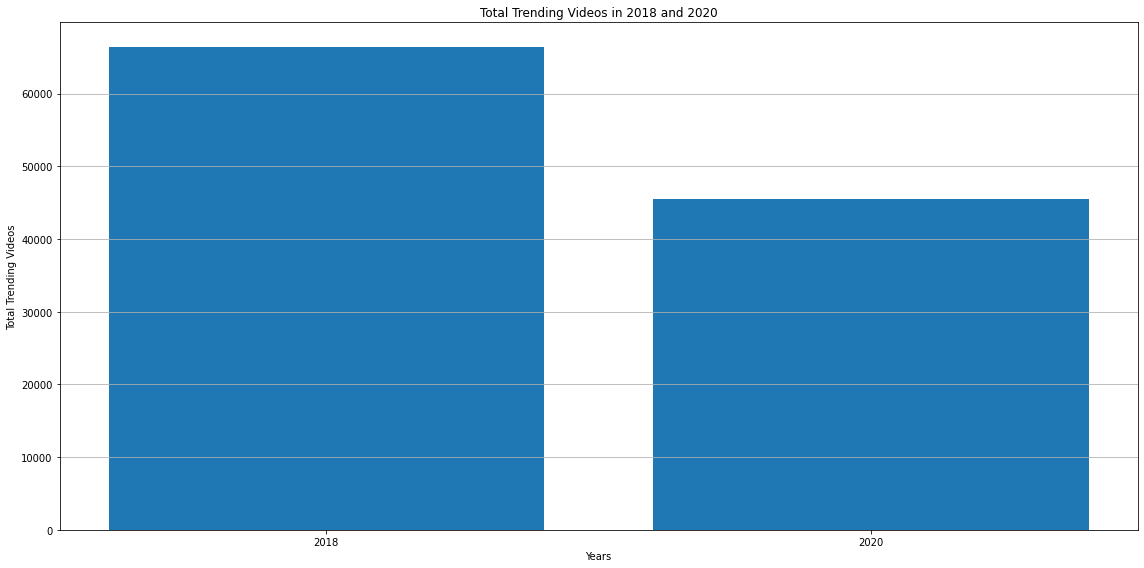

In [185]:
# Total trending videos yearly
totals = [total_2018_df.shape[0], total_2020_df.shape[0]]  # number of rows of each year
print("Trending Video Count 2018: " + str(total_2018_df.shape[0]))
print("Trending Video Count 2020: " + str(total_2020_df.shape[0]))

fig, ax = plt.subplots()
fig.patch.set_facecolor('#FFFFFF')
fig.set_size_inches(16, 8)
years = ['2018', '2020']
x_pos = np.arange(len(years))
ax.bar(x_pos, totals, align='center')
ax.set_ylabel('Total Trending Videos')
ax.set_xlabel('Years')
ax.set_xticks(x_pos)
ax.set_xticklabels(years)
title = 'Total Trending Videos in 2018 and 2020'
ax.set_title(title)
ax.yaxis.grid(True)
plt.tight_layout()
# plt.show()

file_title = title + '.png'
plt.savefig(save_dir + file_title, dpi=100,  transparent=False)

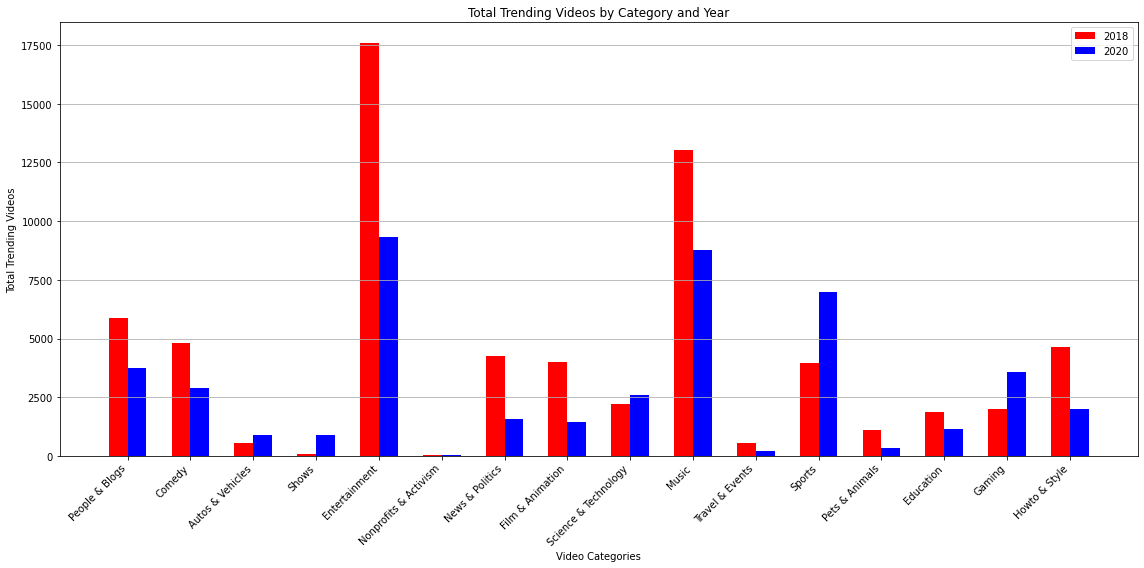

In [198]:
# Total trending videos by category by year
cats_count_2018_series = total_2018_df.groupby('cat_name').count()['title']
cats_count_2020_series = total_2020_df.groupby('cat_name').count()['title']

# Get list of all unique categories
cats = set()
for cat in cats_count_2018_series.keys():
    cats.add(cat)
for cat in cats_count_2020_series.keys():
    cats.add(cat)
    
fig, ax = plt.subplots()
fig.patch.set_facecolor('#FFFFFF')
fig.set_size_inches(16, 8)
width = 3
count = 0
x_ticks = list()

for cat in cats:
    if cat in cats_count_2018_series:
        sum_2018 = cats_count_2018_series[cat]
    else: 0
    
    if cat in cats_count_2020_series:
        sum_2020 = cats_count_2020_series[cat]
    else: 0

    ax.bar(count-width/2, sum_2018, width=width, color='r', align='center')
    ax.bar(count+width/2, sum_2020, width=width, color='b', align='center')
    x_ticks.append(count)
    count += width * 3 + 1
    
ax.set_xticks(x_ticks)
ax.set_xticklabels(cats)
ax.legend(['2018', '2020'])
ax.yaxis.grid(True)
ax.set_ylabel('Total Trending Videos')
ax.set_xlabel('Video Categories')
title = 'Total Trending Videos by Category and Year'
ax.set_title(title)
plt.setp(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.tight_layout()
# plt.show()

file_title = title + '.png'
plt.savefig(save_dir + file_title, dpi=100)

In [160]:
# Numeric representation of number of videos per category
print(cats_count_2018_series.sort_values(), '\n')
print(cats_count_2020_series.sort_values())

cat_name
Nonprofits & Activism       34
Shows                       61
Autos & Vehicles           538
Travel & Events            541
Pets & Animals            1116
Education                 1868
Gaming                    2010
Science & Technology      2216
Sports                    3944
Film & Animation          3989
News & Politics           4256
Howto & Style             4634
Comedy                    4802
People & Blogs            5855
Music                    13026
Entertainment            17587
Name: title, dtype: int64 

cat_name
Nonprofits & Activism      20
Travel & Events           203
Pets & Animals            347
Autos & Vehicles          903
Education                1149
Film & Animation         1453
News & Politics          1560
Howto & Style            2006
Science & Technology     2600
Comedy                   2899
Gaming                   3582
People & Blogs           3735
Sports                   7001
Music                    8771
Entertainment            9328
Name: ti

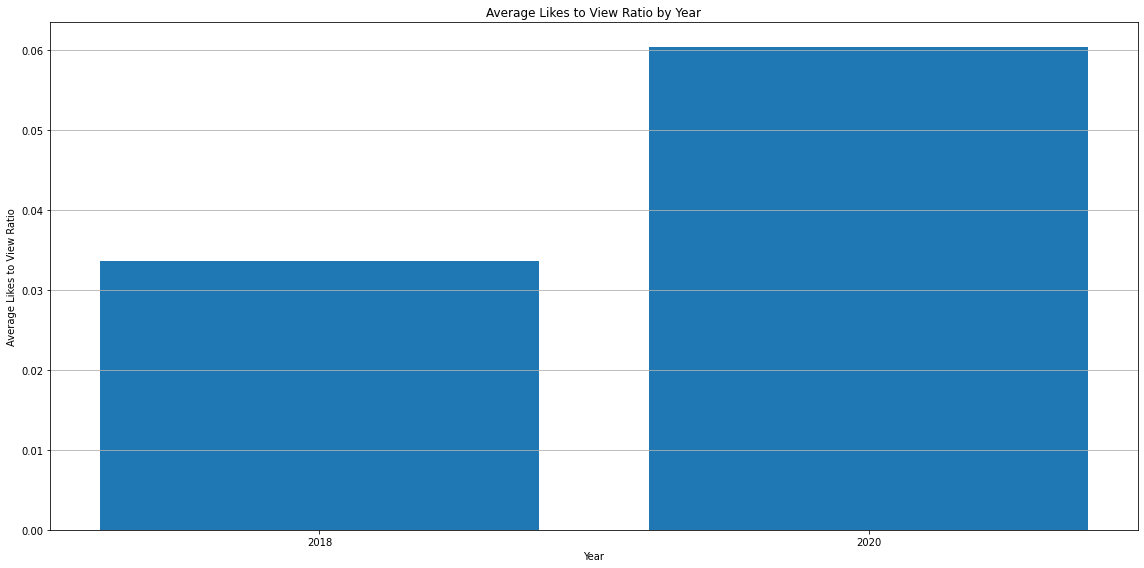

In [161]:
# Avg likes to view ratio by year
ratio_2018_series = total_2018_df['likes_to_views'].mean()
ratio_2020_series = total_2020_df['likes_to_views'].mean()
data = [ratio_2018_series, ratio_2020_series]

fig, ax = plt.subplots()
fig.patch.set_facecolor('#FFFFFF')
fig.set_size_inches(16, 8)
years = ['2018', '2020']
x_pos = np.arange(len(years))
ax.bar(x_pos, data, align='center')
ax.set_ylabel('Average Likes to View Ratio')
ax.set_xlabel('Year')
ax.set_xticks(x_pos)
ax.set_xticklabels(years)
title = 'Average Likes to View Ratio by Year'
ax.set_title(title)
ax.yaxis.grid(True)
plt.tight_layout()
# plt.show()

file_title = title + '.png'
plt.savefig(save_dir + file_title, dpi=100)

In [162]:
# Summary of likes to views data
print("Total Views per video 2018: " + str(total_2018_df['views'].sum()))
print("Total Views per video 2020: " + str(total_2020_df['views'].sum()))
print("Average Views per video 2018: " + str(total_2018_df['views'].mean()))
print("Average Views per video 2020: " + str(total_2020_df['views'].mean()))
print("Likes to Views ratio 2018: {}" .format(ratio_2018_series))
print("Likes to Views ratio 2020: {}" .format(ratio_2020_series))

Total Views per video 2018: 199167496370
Total Views per video 2020: 107923273604
Average Views per video 2018: 2996036.168449238
Average Views per video 2020: 2368972.355598481
Likes to Views ratio 2018: 0.033632002005378955
Likes to Views ratio 2020: 0.060402189045125745


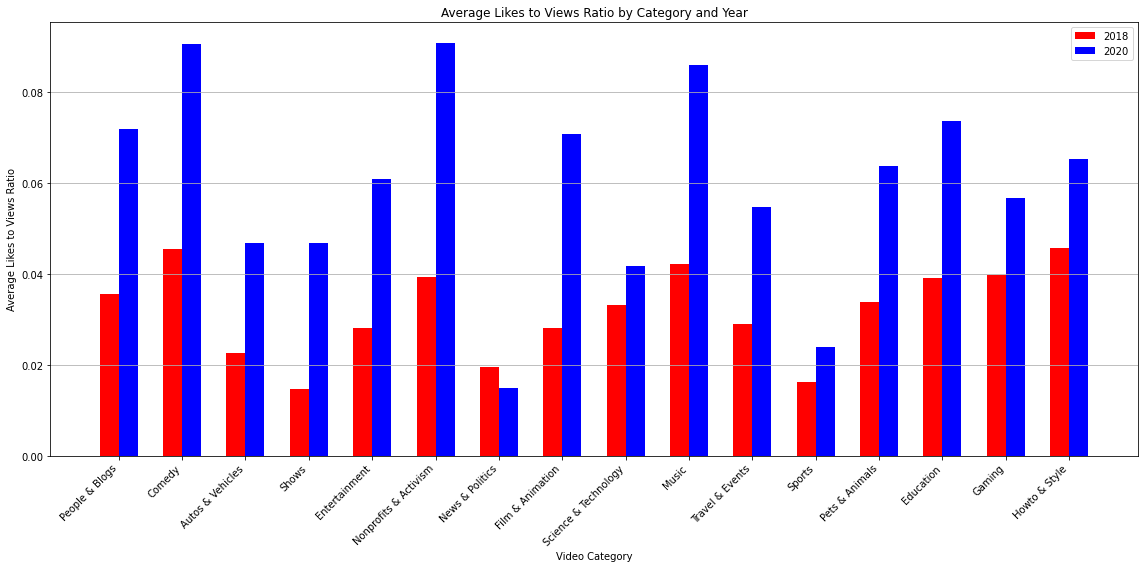

In [197]:
# Avg likes to view ratio by category by year
ratio_2018_series = total_2018_df.groupby('cat_name').mean()['likes_to_views']
ratio_2020_series = total_2020_df.groupby('cat_name').mean()['likes_to_views']

# Get list of all unique categories
cats = set()
for cat in ratio_2018_series.keys():
    cats.add(cat)
for cat in ratio_2020_series.keys():
    cats.add(cat)
    
fig, ax = plt.subplots()
fig.patch.set_facecolor('#FFFFFF')
fig.set_size_inches(16, 8)
width = 3
count = 0
x_ticks = list()

for cat in cats:
    if cat in ratio_2018_series:
        sum_2018 = ratio_2018_series[cat]
    else: 0
    
    if cat in ratio_2020_series:
        sum_2020 = ratio_2020_series[cat]
    else: 0
        
    ax.bar(count-width/2, sum_2018, width=width, color='r', align='center')
    ax.bar(count+width/2, sum_2020, width=width, color='b', align='center')
    x_ticks.append(count)
    count += width * 3 + 1
    
ax.set_xticks(x_ticks)
ax.set_xticklabels(cats)
ax.legend(['2018', '2020'])
title = 'Average Likes to Views Ratio by Category and Year'
ax.set_title(title)
ax.set_ylabel('Average Likes to Views Ratio')
ax.set_xlabel('Video Category')
ax.yaxis.grid(True)
plt.setp(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.tight_layout()
# plt.show()

file_title = title + '.png'
plt.savefig(save_dir + file_title, dpi=100)

## Canada Data

In [164]:
# read in data
ca_2018_df = pd.read_csv('./transformed-data/2018_CA_data.csv')
ca_2020_df = pd.read_csv('./transformed-data/2020_CA_data.csv')

Trending Video Count Canada 2018: 22268
Trending Video Count Canada 2020: 15174


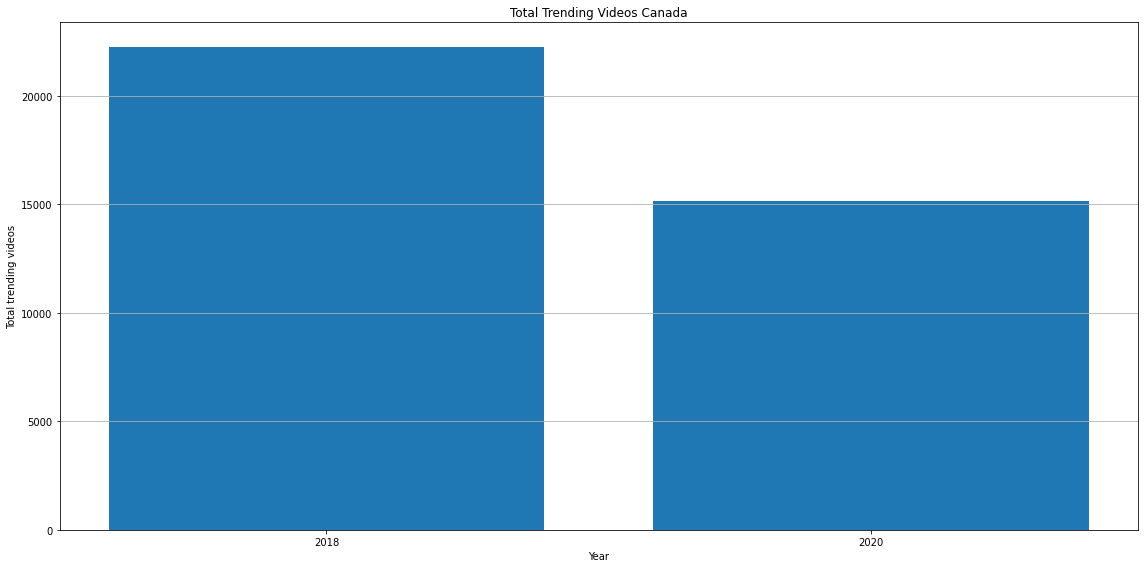

In [187]:
# Total trending videos
totals = [ca_2018_df.shape[0], ca_2020_df.shape[0]]  # number of rows of each year
print("Trending Video Count Canada 2018: " + str(ca_2018_df.shape[0]))
print("Trending Video Count Canada 2020: " + str(ca_2020_df.shape[0]))

fig, ax = plt.subplots()
fig.patch.set_facecolor('#FFFFFF')
fig.set_size_inches(16, 8)
years = ['2018', '2020']
x_pos = np.arange(len(years))
ax.bar(x_pos, totals, align='center')
ax.set_ylabel('Total trending videos')
ax.set_xlabel('Year')
ax.set_xticks(x_pos)
ax.set_xticklabels(years)
title = 'Total Trending Videos Canada'
ax.set_title(title)
ax.yaxis.grid(True)
plt.tight_layout()
# plt.show()

file_title ='CA - ' + title + '.png'
plt.savefig(save_dir + file_title, dpi=100)

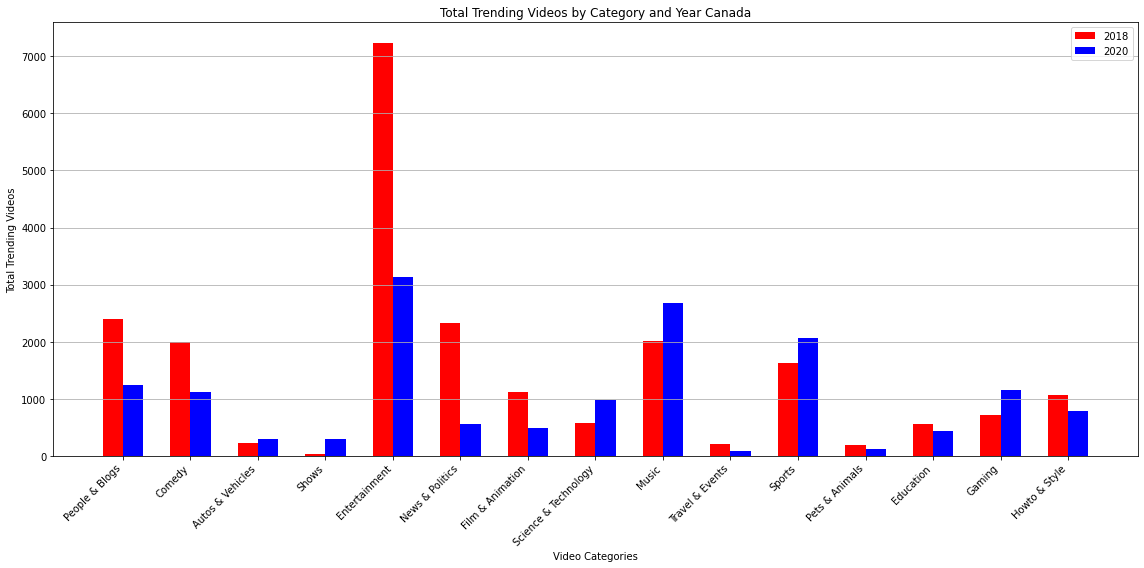

In [199]:
# Total trending videos by category by year
cats_count_2018_series = ca_2018_df.groupby('cat_name').count()['title']
cats_count_2020_series = ca_2020_df.groupby('cat_name').count()['title']

# Get list of all unique categories
cats = set()
for cat in cats_count_2018_series.keys():
    cats.add(cat)
for cat in cats_count_2020_series.keys():
    cats.add(cat)
    
fig, ax = plt.subplots()
fig.patch.set_facecolor('#FFFFFF')
fig.set_size_inches(16, 8)
width = 3
count = 0
x_ticks = list()

for cat in cats:
    if cat in cats_count_2018_series:
        sum_2018 = cats_count_2018_series[cat]
    else: 0
    
    if cat in cats_count_2020_series:
        sum_2020 = cats_count_2020_series[cat]
    else: 0

    ax.bar(count-width/2, sum_2018, width=width, color='r', align='center')
    ax.bar(count+width/2, sum_2020, width=width, color='b', align='center')
    x_ticks.append(count)
    count += width * 3 + 1
    
ax.set_xticks(x_ticks)
ax.set_xticklabels(cats)
ax.legend(['2018', '2020'])
ax.yaxis.grid(True)
ax.set_ylabel('Total Trending Videos')
ax.set_xlabel('Video Categories')
title = 'Total Trending Videos by Category and Year Canada'
ax.set_title(title)
plt.setp(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
# plt.show()
plt.tight_layout()

file_title ='CA - ' + title + '.png'
plt.savefig(save_dir + file_title, dpi=100)

In [167]:
# Numeric representation of number of videos per category
print(cats_count_2018_series.sort_values(),'\n')
print(cats_count_2020_series.sort_values())

cat_name
Shows                     38
Pets & Animals           186
Travel & Events          208
Autos & Vehicles         218
Education                564
Science & Technology     571
Gaming                   711
Howto & Style           1074
Film & Animation        1122
Sports                  1627
Comedy                  1987
Music                   2006
News & Politics         2326
People & Blogs          2398
Entertainment           7232
Name: title, dtype: int64 

cat_name
Travel & Events           83
Pets & Animals           124
Autos & Vehicles         303
Education                429
Film & Animation         493
News & Politics          556
Howto & Style            791
Science & Technology     982
Comedy                  1115
Gaming                  1163
People & Blogs          1242
Sports                  2071
Music                   2685
Entertainment           3137
Name: title, dtype: int64


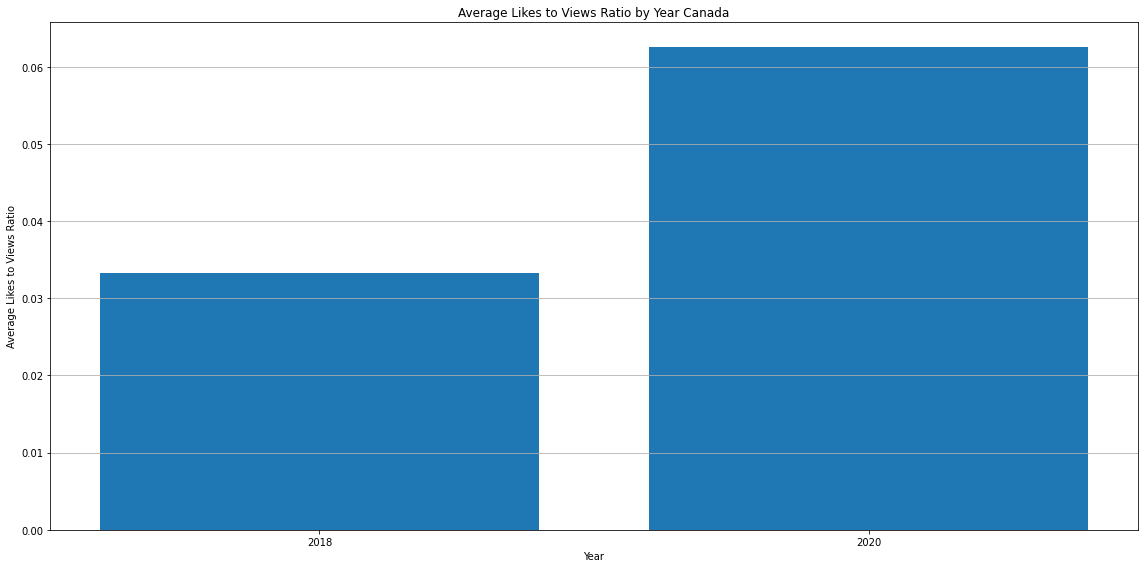

In [168]:
# Avg likes to view ratio
ratio_2018_series = ca_2018_df['likes_to_views'].mean()
ratio_2020_series = ca_2020_df['likes_to_views'].mean()
data = [ratio_2018_series, ratio_2020_series]

fig, ax = plt.subplots()
fig.patch.set_facecolor('#FFFFFF')
fig.set_size_inches(16, 8)
years = ['2018', '2020']
x_pos = np.arange(len(years))
ax.bar(x_pos, data, align='center')
ax.set_ylabel('Average Likes to Views Ratio')
ax.set_xlabel('Year')
ax.set_xticks(x_pos)
ax.set_xticklabels(years)
title = 'Average Likes to Views Ratio by Year Canada'
ax.set_title(title)
ax.yaxis.grid(True)
# plt.show()
plt.tight_layout()

file_title ='CA - ' + title + '.png'
plt.savefig(save_dir + file_title, dpi=100)

In [169]:
# Summary of Canada data
print("Total Views per video 2018: " + str(ca_2018_df['views'].sum()))
print("Total Views per video 2020: " + str(ca_2020_df['views'].sum()))
print("Average Views per video 2018: " + str(ca_2018_df['views'].mean()))
print("Average Views per video 2020: " + str(ca_2020_df['views'].mean()))
print("Like to view ratio 2018: {}" .format(ratio_2018_series))
print("Like to view ratio 2020: {}" .format(ratio_2020_series))

Total Views per video 2018: 23592888700
Total Views per video 2020: 37182111264
Average Views per video 2018: 1059497.4268007905
Average Views per video 2020: 2450382.975088968
Like to view ratio 2018: 0.03331746926032518
Like to view ratio 2020: 0.06261208331984511


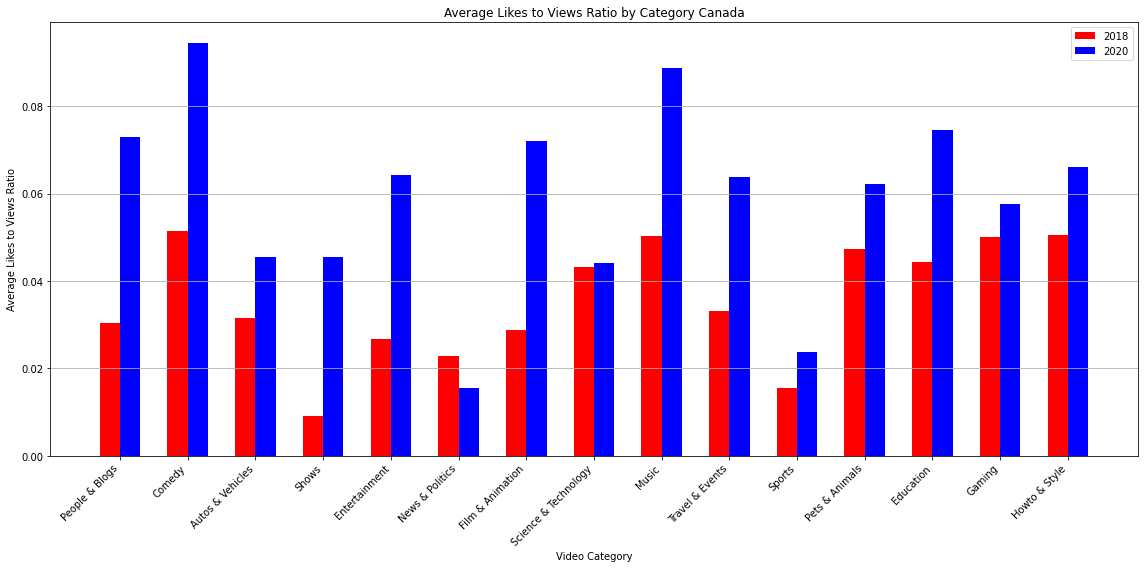

In [170]:
# Avg likes to view ratio by category by year
ratio_2018_series = ca_2018_df.groupby('cat_name').mean()['likes_to_views']
ratio_2020_series = ca_2020_df.groupby('cat_name').mean()['likes_to_views']

# Get list of all unique categories
cats = set()
for cat in ratio_2018_series.keys():
    cats.add(cat)
for cat in ratio_2020_series.keys():
    cats.add(cat)
    
fig, ax = plt.subplots()
fig.patch.set_facecolor('#FFFFFF')
fig.set_size_inches(16, 8)
width = 3
count = 0
x_ticks = list()

for cat in cats:
    if cat in ratio_2018_series:
        sum_2018 = ratio_2018_series[cat]
    else: 0
    
    if cat in ratio_2020_series:
        sum_2020 = ratio_2020_series[cat]
    else: 0
        
    ax.bar(count-width/2, sum_2018, width=width, color='r', align='center')
    ax.bar(count+width/2, sum_2020, width=width, color='b', align='center')
    x_ticks.append(count)
    count += width * 3 + 1
    
ax.set_xticks(x_ticks)
ax.set_xticklabels(cats)
ax.legend(['2018', '2020'])
title = 'Average Likes to Views Ratio by Category Canada'
ax.set_title(title)
ax.set_ylabel('Average Likes to Views Ratio')
ax.set_xlabel('Video Category')
ax.yaxis.grid(True)
plt.setp(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
# plt.show()
plt.tight_layout()

file_title ='CA - ' + title + '.png'
plt.savefig(save_dir + file_title, dpi=100)

## Great Britain Data

In [171]:
# read in data
gb_2018_df = pd.read_csv('./transformed-data/2018_GB_data.csv')
gb_2020_df = pd.read_csv('./transformed-data/2020_GB_data.csv')

Trending Video Count Great Britain 2018: 21859
Trending Video Count Great Britain 2020: 15185


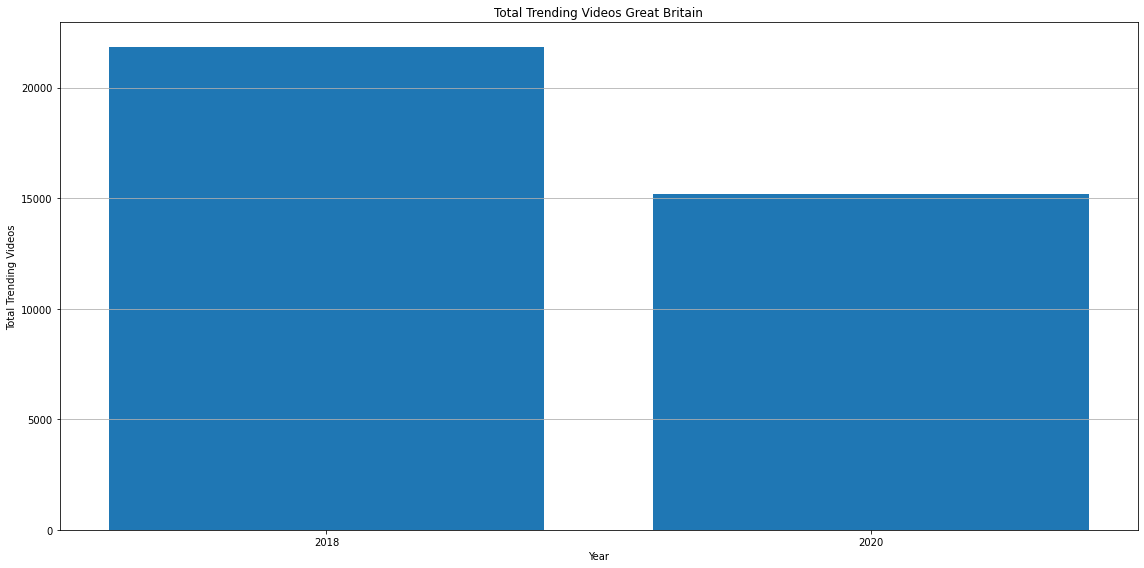

In [188]:
# Total trending videos
totals = [gb_2018_df.shape[0], gb_2020_df.shape[0]]  # number of rows of each year
print("Trending Video Count Great Britain 2018: " + str(gb_2018_df.shape[0]))
print("Trending Video Count Great Britain 2020: " + str(gb_2020_df.shape[0]))

fig, ax = plt.subplots()
fig.patch.set_facecolor('#FFFFFF')
fig.set_size_inches(16, 8)
years = ['2018', '2020']
x_pos = np.arange(len(years))
ax.bar(x_pos, totals, align='center')
ax.set_ylabel('Total Trending Videos')
ax.set_xlabel('Year')
ax.set_xticks(x_pos)
ax.set_xticklabels(years)
ax.set_title('Total Trending Videos Great Britain')
ax.yaxis.grid(True)
plt.tight_layout()
# plt.show()

file_title = 'GB - ' + title + '.png'
plt.savefig(save_dir + file_title, dpi=100)

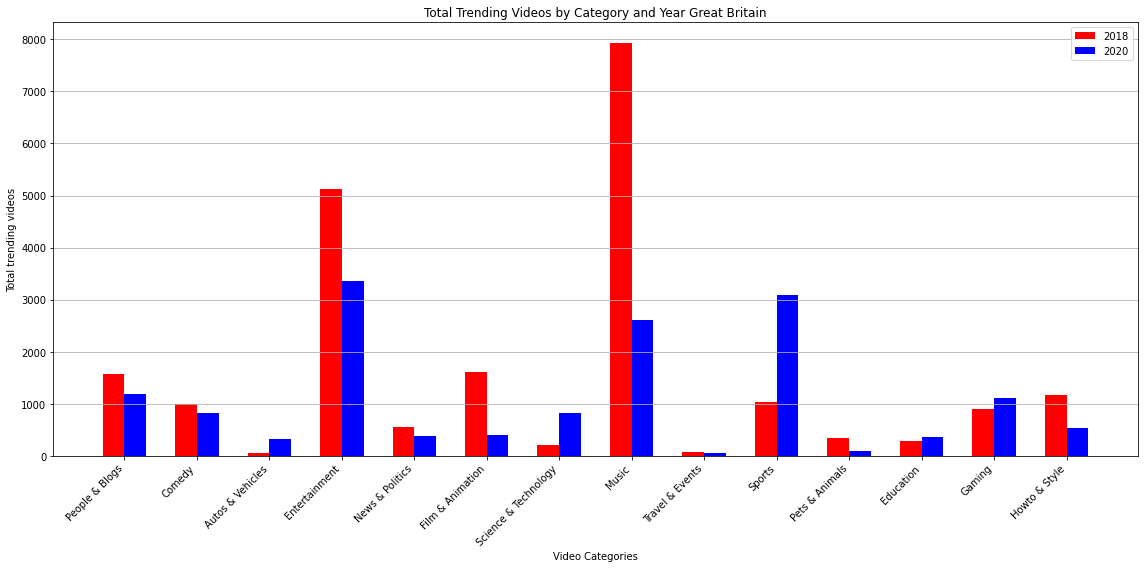

In [173]:
# Total trending videos by category by year
cats_count_2018_series = gb_2018_df.groupby(['cat_name']).count()['title']
cats_count_2020_series = gb_2020_df.groupby(['cat_name']).count()['title']

# Get list of all unique categories
cats = set()
for cat in cats_count_2018_series.keys():
    cats.add(cat)
for cat in cats_count_2020_series.keys():
    cats.add(cat)
    
fig, ax = plt.subplots()
fig.patch.set_facecolor('#FFFFFF')
fig.set_size_inches(16, 8)
width = 3
count = 0
x_ticks = list()

for cat in cats:
    if cat in cats_count_2018_series:
         sum_2018 = cats_count_2018_series[cat]
    else: 0
    
    if cat in cats_count_2020_series:
        sum_2020 = cats_count_2020_series[cat]
    else: 0

    ax.bar(count-width/2, sum_2018, width=width, color='r', align='center')
    ax.bar(count+width/2, sum_2020, width=width, color='b', align='center')
    x_ticks.append(count)
    count += width * 3 + 1
    
ax.set_xticks(x_ticks)
ax.set_xticklabels(cats)
ax.legend(['2018', '2020'])
ax.yaxis.grid(True)
ax.set_ylabel('Total trending videos')
ax.set_xlabel('Video Categories')
title = 'Total Trending Videos by Category and Year Great Britain'
ax.set_title(title)
plt.setp(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.tight_layout()
# plt.show()

file_title = 'GB - ' + title + '.png'
plt.savefig(save_dir + file_title, dpi=100)

In [174]:
# Summary of Great Britian data
print(cats_count_2018_series.sort_values(), '\n')
print(cats_count_2020_series.sort_values())

cat_name
Autos & Vehicles          50
Travel & Events           77
Science & Technology     216
Education                283
Pets & Animals           350
News & Politics          550
Gaming                   898
Comedy                   996
Sports                  1035
Howto & Style           1163
People & Blogs          1569
Film & Animation        1617
Entertainment           5127
Music                   7928
Name: title, dtype: int64 

cat_name
Travel & Events           58
Pets & Animals           100
Autos & Vehicles         331
Education                362
News & Politics          391
Film & Animation         395
Howto & Style            528
Science & Technology     820
Comedy                   821
Gaming                  1118
People & Blogs          1198
Music                   2608
Sports                  3087
Entertainment           3368
Name: title, dtype: int64


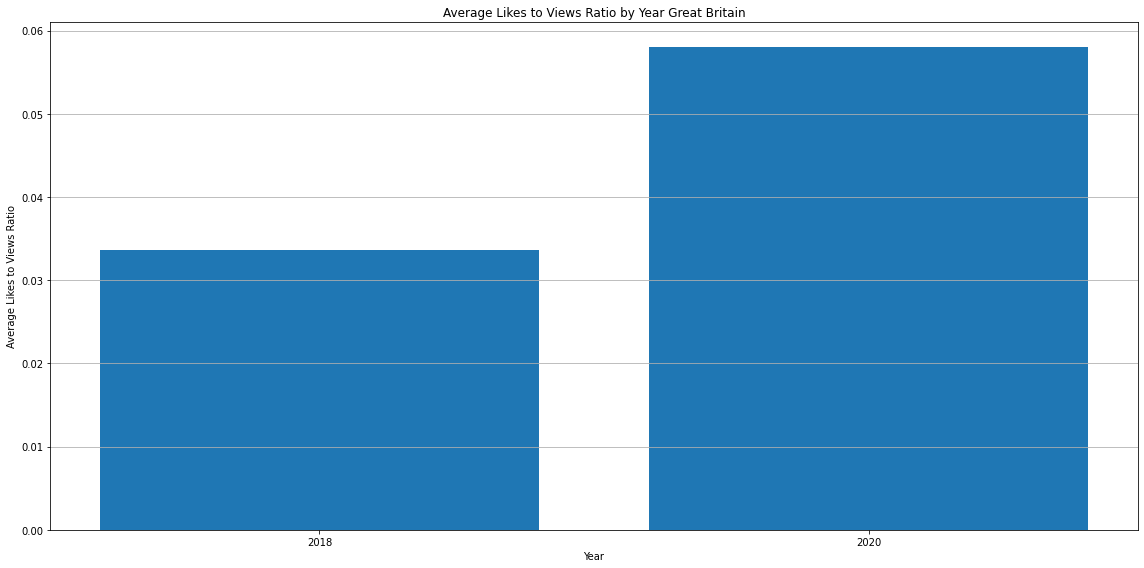

In [175]:
# Avg likes to view ratio
ratio_2018_series = gb_2018_df['likes_to_views'].mean()
ratio_2020_series = gb_2020_df['likes_to_views'].mean()
data = [ratio_2018_series, ratio_2020_series]

fig, ax = plt.subplots()
fig.patch.set_facecolor('#FFFFFF')
fig.set_size_inches(16, 8)
years = ['2018', '2020']
x_pos = np.arange(len(years))
ax.bar(x_pos, data, align='center')
ax.set_ylabel('Average Likes to Views Ratio')
ax.set_xlabel('Year')
ax.set_xticks(x_pos)
ax.set_xticklabels(years)
title = 'Average Likes to Views Ratio by Year Great Britain'
ax.set_title(title)
ax.yaxis.grid(True)
# plt.show()
plt.tight_layout()

file_title = 'GB - ' + title + '.png'
plt.savefig(save_dir + file_title, dpi=100)

In [176]:
# Summary of data for Great Britain
print("Total Views per video 2018: " + str(gb_2018_df['views'].sum()))
print("Total Views per video 2020: " + str(gb_2020_df['views'].sum()))
print("Average Views per video 2018: " + str(gb_2018_df['views'].mean()))
print("Average Views per video 2020: " + str(gb_2020_df['views'].mean()))
print("Like to views ratio 2018: {}" .format(ratio_2018_series))
print("Like to views ratio 2020: {}" .format(ratio_2020_series))

Total Views per video 2018: 134948195969
Total Views per video 2020: 30224786256
Average Views per video 2018: 6173575.916967839
Average Views per video 2020: 1990437.0270661837
Like to views ratio 2018: 0.03360574839926842
Like to views ratio 2020: 0.0580813327695542


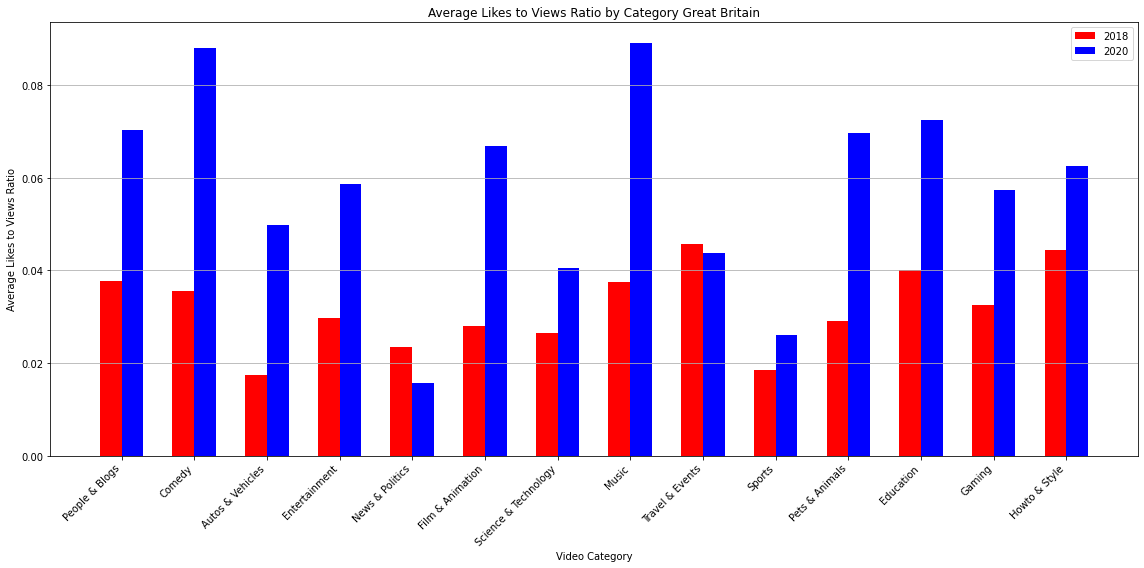

In [177]:
# Avg likes to view ratio by category by year
ratio_2018_series = gb_2018_df.groupby('cat_name').mean()['likes_to_views']
ratio_2020_series = gb_2020_df.groupby('cat_name').mean()['likes_to_views']

# Get list of all unique categories
cats = set()
for cat in ratio_2018_series.keys():
    cats.add(cat)
for cat in ratio_2020_series.keys():
    cats.add(cat)
    
fig, ax = plt.subplots()
fig.patch.set_facecolor('#FFFFFF')
fig.set_size_inches(16, 8)
width = 3
count = 0
x_ticks = list()

for cat in cats:
    if cat in ratio_2018_series:
         sum_2018 = ratio_2018_series[cat]
    else: 0
    
    if cat in ratio_2020_series:
        sum_2020 = ratio_2020_series[cat]
    else: 0
        
    ax.bar(count-width/2, sum_2018, width=width, color='r', align='center')
    ax.bar(count+width/2, sum_2020, width=width, color='b', align='center')
    x_ticks.append(count)
    count += width * 3 + 1
    
ax.set_xticks(x_ticks)
ax.set_xticklabels(cats)
ax.legend(['2018', '2020'])
title = 'Average Likes to Views Ratio by Category Great Britain'
ax.set_title(title)
ax.set_ylabel('Average Likes to Views Ratio')
ax.set_xlabel('Video Category')
ax.yaxis.grid(True)
plt.setp(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
# plt.show()
plt.tight_layout()

file_title = 'GB - ' + title + '.png'
plt.savefig(save_dir + file_title, dpi=100)

### USA Data

In [178]:
# read in data
us_2018_df = pd.read_csv('./transformed-data/2018_US_data.csv')
us_2020_df = pd.read_csv('./transformed-data/2020_US_data.csv')

Trending Video Count USA 2018: 22350
Trending Video Count USA 2020: 15198


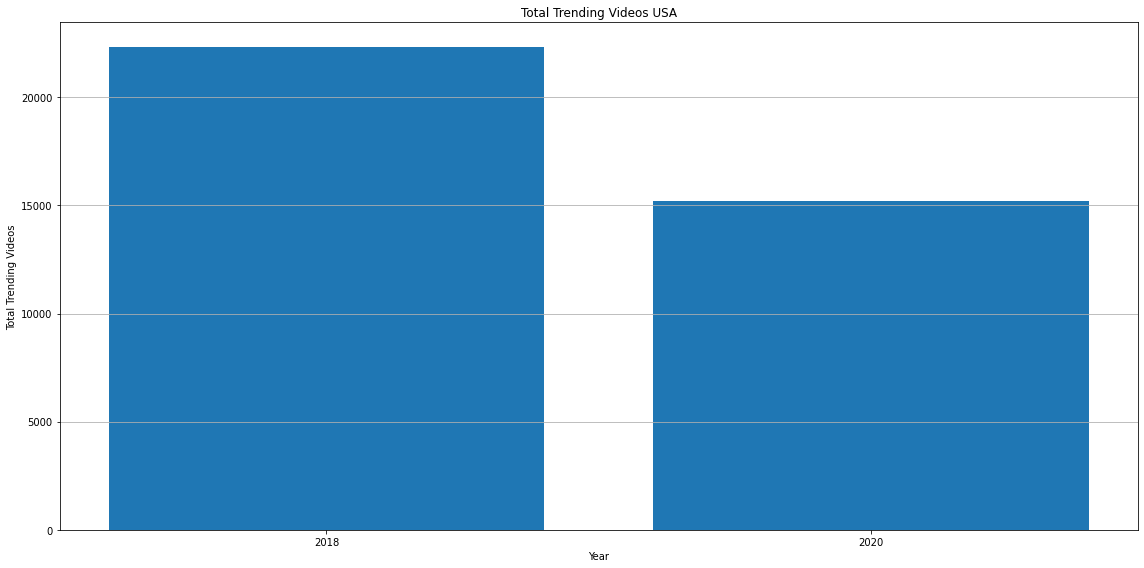

In [189]:
# Total trending videos
totals = [us_2018_df.shape[0], us_2020_df.shape[0]]  # number of rows of each year
print("Trending Video Count USA 2018: " + str(us_2018_df.shape[0]))
print("Trending Video Count USA 2020: " + str(us_2020_df.shape[0]))

fig, ax = plt.subplots()
fig.patch.set_facecolor('#FFFFFF')
fig.set_size_inches(16, 8)
years = ['2018', '2020']
x_pos = np.arange(len(years))
ax.bar(x_pos, totals, align='center')
ax.set_ylabel('Total Trending Videos')
ax.set_xlabel('Year')
ax.set_xticks(x_pos)
ax.set_xticklabels(years)
title = 'Total Trending Videos USA'
ax.set_title(title)
ax.yaxis.grid(True)
plt.tight_layout()
# plt.show()

file_title = 'US - ' + title + '.png'
plt.savefig(save_dir + file_title, dpi=100)

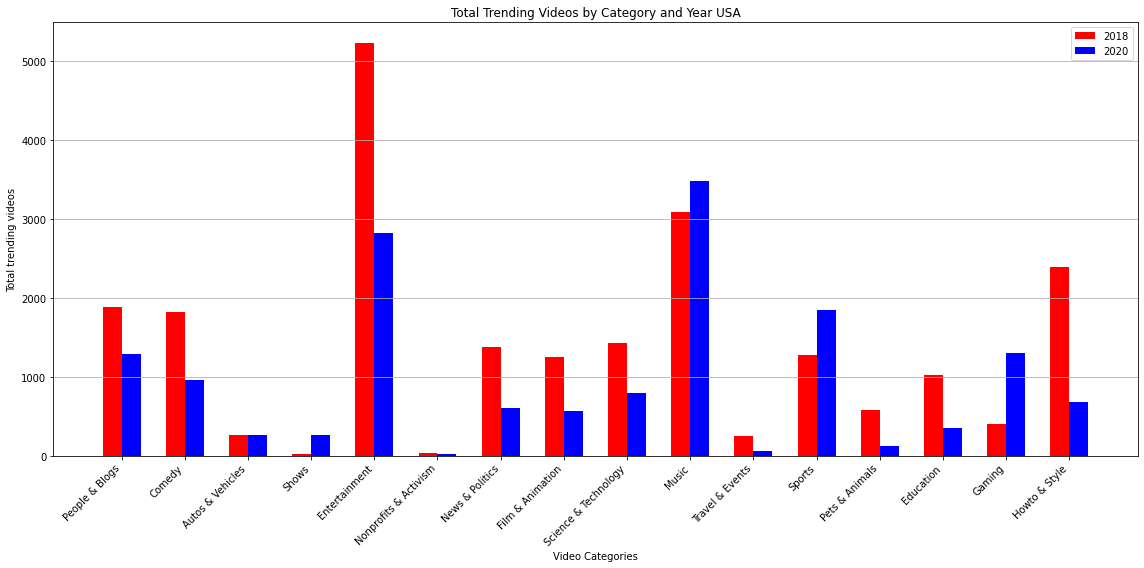

In [190]:
# Total trending videos by category by year

cats_count_2018_series = us_2018_df.groupby('cat_name').count()['title']
cats_count_2020_series = us_2020_df.groupby('cat_name').count()['title']

# Get list of all unique categories
cats = set()
for cat in cats_count_2018_series.keys():
    cats.add(cat)
for cat in cats_count_2020_series.keys():
    cats.add(cat)
    
fig, ax = plt.subplots()
fig.patch.set_facecolor('#FFFFFF')
fig.set_size_inches(16, 8)
width = 3
count = 0
x_ticks = list()

for cat in cats:
    if cat in cats_count_2018_series:
         sum_2018 = cats_count_2018_series[cat]
    else: 0
    
    if cat in cats_count_2020_series:
        sum_2020 = cats_count_2020_series[cat]
    else: 0

    ax.bar(count-width/2, sum_2018, width=width, color='r', align='center')
    ax.bar(count+width/2, sum_2020, width=width, color='b', align='center')
    x_ticks.append(count)
    count += width * 3 + 1
    
ax.set_xticks(x_ticks)
ax.set_xticklabels(cats)
ax.legend(['2018', '2020'])
ax.yaxis.grid(True)
ax.set_ylabel('Total trending videos')
ax.set_xlabel('Video Categories')
title = 'Total Trending Videos by Category and Year USA'
ax.set_title(title)
plt.setp(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
# plt.show()
plt.tight_layout()

file_title = 'US - ' + title + '.png'
plt.savefig(save_dir + file_title, dpi=100)

In [191]:
print(cats_count_2018_series.sort_values(), '\n')
print(cats_count_2020_series.sort_values())

cat_name
Shows                      23
Nonprofits & Activism      34
Travel & Events           256
Autos & Vehicles          270
Gaming                    401
Pets & Animals            580
Education                1021
Film & Animation         1250
Sports                   1282
News & Politics          1380
Science & Technology     1429
Comedy                   1819
People & Blogs           1888
Howto & Style            2397
Music                    3092
Entertainment            5228
Name: title, dtype: int64 

cat_name
Nonprofits & Activism      20
Travel & Events            62
Pets & Animals            123
Autos & Vehicles          269
Education                 358
Film & Animation          565
News & Politics           613
Howto & Style             687
Science & Technology      798
Comedy                    963
People & Blogs           1295
Gaming                   1301
Sports                   1843
Entertainment            2823
Music                    3478
Name: title, dtype: int6

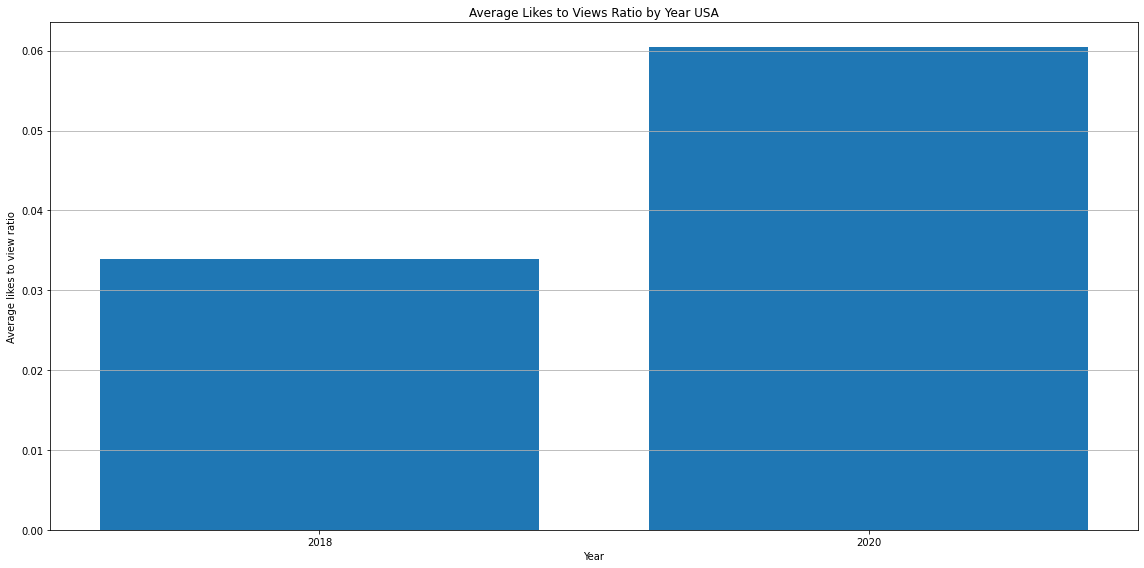

In [192]:
# Avg likes to view ratio
ratio_2018_series = us_2018_df['likes_to_views'].mean()
ratio_2020_series = us_2020_df['likes_to_views'].mean()
data = [ratio_2018_series, ratio_2020_series]

fig, ax = plt.subplots()
fig.patch.set_facecolor('#FFFFFF')
fig.set_size_inches(16, 8)
years = ['2018', '2020']
x_pos = np.arange(len(years))
ax.bar(x_pos, data, align='center')
ax.set_ylabel('Average likes to view ratio')
ax.set_xlabel('Year')
ax.set_xticks(x_pos)
ax.set_xticklabels(years)
title = 'Average Likes to Views Ratio by Year USA'
ax.set_title(title)
ax.yaxis.grid(True)
# plt.show()
plt.tight_layout()

file_title = 'US - ' + title + '.png'
plt.savefig(save_dir + file_title, dpi=100)

In [193]:
# Summary of USA data
print("Total Views per video 2018: " + str(us_2018_df['views'].sum()))
print("Total Views per video 2020: " + str(us_2020_df['views'].sum()))
print("Average Views per video 2018: " + str(us_2018_df['views'].mean()))
print("Average Views per video 2020: " + str(us_2020_df['views'].mean()))
print("Like to view ratio 2018: {}" .format(ratio_2018_series))
print("Like to view ratio 2020: {}" .format(ratio_2020_series))

Total Views per video 2018: 40626411701
Total Views per video 2020: 40516376084
Average Views per video 2018: 1817736.5414317674
Average Views per video 2020: 2665901.834715094
Like to view ratio 2018: 0.03397105760908488
Like to view ratio 2020: 0.060514502899822846


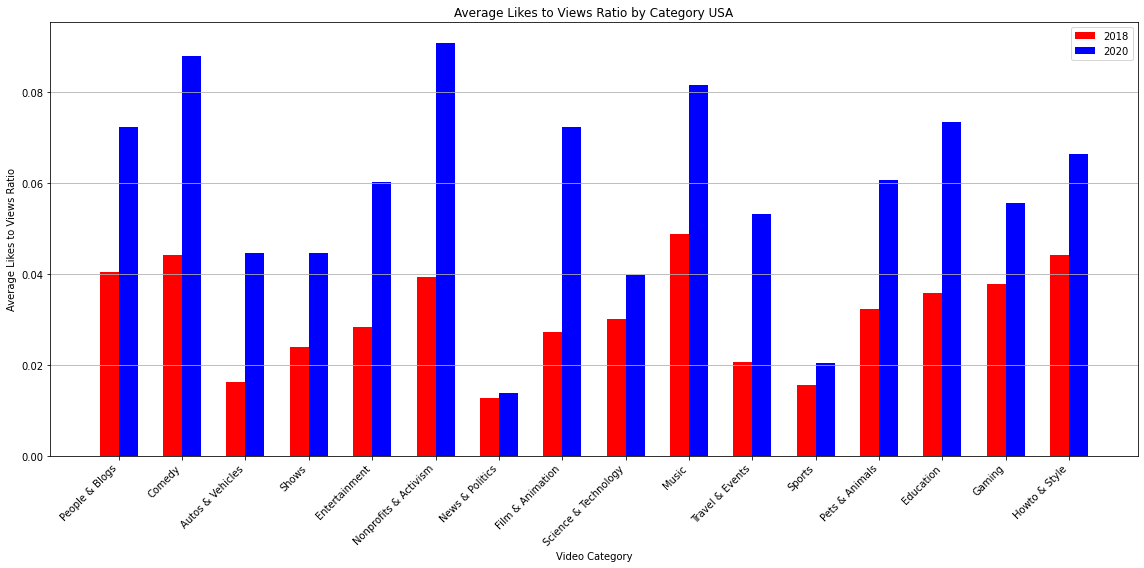

In [200]:
# Avg likes to view ratio by category by year
ratio_2018_series = us_2018_df.groupby('cat_name').mean()['likes_to_views']
ratio_2020_series = us_2020_df.groupby('cat_name').mean()['likes_to_views']

# Get list of all unique categories
cats = set()
for cat in ratio_2018_series.keys():
    cats.add(cat)
for cat in ratio_2020_series.keys():
    cats.add(cat)
    
fig, ax = plt.subplots()
fig.patch.set_facecolor('#FFFFFF')
fig.set_size_inches(16, 8)
width = 3
count = 0
x_ticks = list()

for cat in cats:
    if cat in ratio_2018_series:
        sum_2018 = ratio_2018_series[cat]
    else: 0
    
    if cat in ratio_2020_series:
        sum_2020 = ratio_2020_series[cat]
    else: 0
        
    ax.bar(count-width/2, sum_2018, width=width, color='r', align='center')
    ax.bar(count+width/2, sum_2020, width=width, color='b', align='center')
    x_ticks.append(count)
    count += width * 3 + 1
    
ax.set_xticks(x_ticks)
ax.set_xticklabels(cats)
ax.legend(['2018', '2020'])
title = 'Average Likes to Views Ratio by Category USA'
ax.set_title(title)
ax.set_ylabel('Average Likes to Views Ratio')
ax.set_xlabel('Video Category')
ax.yaxis.grid(True)
plt.setp(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
# plt.show()
plt.tight_layout()

file_title = 'US - ' + title + '.png'
plt.savefig(save_dir + file_title, dpi=100)